In [18]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [19]:
# Read in data from CSV file, skipping the first row
df = pd.read_csv('dataset.csv')

In [20]:
# Create an empty graph
graph = nx.Graph()

In [21]:
# Add nodes for each user
users = df['usernames'].unique()
graph.add_nodes_from(users)

In [22]:
# Optimize edge creation
# Create a dictionary where each user is mapped to the set of subreddits they participated in
user_subs = {user: set(df.loc[df['usernames'] == user][df.columns[1:]].stack().dropna().values) for user in users}
# Convert the sets of subreddits to lists
user_subs = {user: list(subs) for user, subs in user_subs.items()}

In [23]:
# Add edges for each combination of users who participated in the same subreddit
for i, user1 in enumerate(users):
    print(f'Start user {user1}')
    user1_subs_list = user_subs[user1]
    for user2 in users[i + 1:]:
        user2_subs_list = user_subs[user2]
        # Find the common subreddits between user1 and user2
        common_subs = set(user1_subs_list).intersection(user2_subs_list)
        if common_subs:
            # Convert the set of common subreddits to a list
            common_subs_list = list(common_subs)
            # Exclude unsupported data values (e.g., datetime objects) by converting them to strings
            common_subs_list = [str(sub) for sub in common_subs_list]
            # Add an edge between user1 and user2 with the common subreddits as an attribute
            graph.add_edge(user1, user2, subreddits=common_subs_list)
    print(f'Finished user {user1}')

Start user rampzn
Finished user rampzn
Start user pencilpushin
Finished user pencilpushin
Start user Vardath
Finished user Vardath
Start user Onerocket262
Finished user Onerocket262
Start user Theagenes1
Finished user Theagenes1
Start user BananaBeef
Finished user BananaBeef
Start user canoli91
Finished user canoli91
Start user tool-94
Finished user tool-94
Start user After-Power-5155
Finished user After-Power-5155
Start user 1336isusernow
Finished user 1336isusernow
Start user Anonymouse207212
Finished user Anonymouse207212
Start user potkamas
Finished user potkamas
Start user HELPMELEARNMORE
Finished user HELPMELEARNMORE
Start user 1bir
Finished user 1bir
Start user irrelevantappelation
Finished user irrelevantappelation
Start user Vo_Sirisov
Finished user Vo_Sirisov
Start user FerdinandTheGiant
Finished user FerdinandTheGiant
Start user VisiteProlongee
Finished user VisiteProlongee
Start user turtleinawholeshell
Finished user turtleinawholeshell
Start user jamesofthedrum
Finished us

In [24]:
# Set data type for 'subreddits' attribute explicitly
# Convert the 'subreddits' attribute of each edge to a string
nx.set_edge_attributes(graph, {edge: str(graph.edges[edge]['subreddits']) for edge in graph.edges}, 'subreddits')
print("end")

end


In [25]:
# Print the number of nodes and edges in the graph
print('Number of nodes:', graph.number_of_nodes())
print('Number of edges:', graph.number_of_edges())

Number of nodes: 23173
Number of edges: 6877773


In [26]:
# Save the graph in GraphML format
nx.write_graphml(graph, 'Network.graphml')

(-1.209987195134163,
 1.2098652440309525,
 -1.2097150442004203,
 1.2095281836390495)

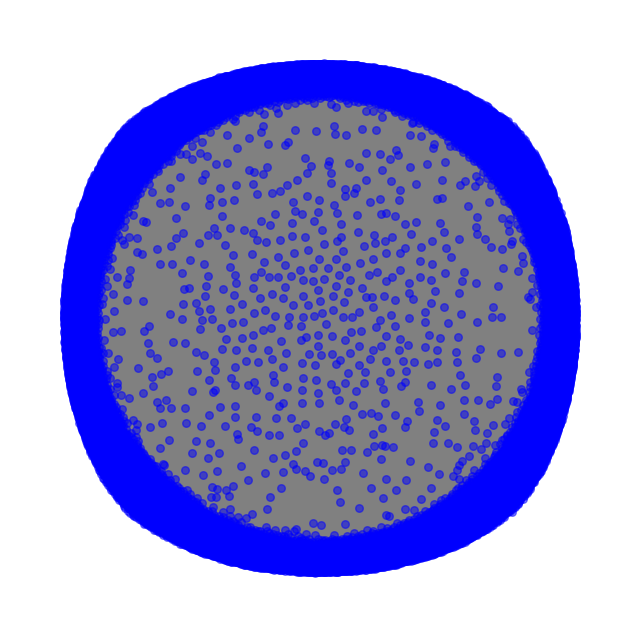

In [34]:
# Draw the graph using NetworkX
fig, ax = plt.subplots(figsize=(8, 8))
# Compute the layout of the graph using the spring layout algorithm with a random seed and a distance parameter
pos = nx.spring_layout(graph, seed=42, k=3)
# Draw nodes with blue color and transparency
nx.draw_networkx_nodes(graph, pos, node_size=30, node_color='blue', alpha=0.5)
# Draw edges with gray color and transparency
nx.draw_networkx_edges(graph, pos, edge_color='gray', alpha=0.5, width=2)
# Turn off the axis
plt.axis('off')

In [ ]:
# Display the graph
plt.show()

: 

#### Build the Network
This code performs the following tasks:
1. Imports necessary libraries: `pandas`, `networkx`, and `matplotlib.pyplot`.
2. Reads data from a CSV file called "dataset.csv" using the `pd.read_csv()` function and stores it in a DataFrame called `df`.
3. Creates an empty graph using the `nx.Graph()` function and assigns it to the variable `graph`.
4. Extracts unique usernames from the 'usernames' column of the DataFrame and stores them in the `users` variable.
5. Adds nodes to the graph for each unique username using the `graph.add_nodes_from()` function.
6. Optimizes the creation of edges by performing the following steps:
   - Creates a dictionary called `user_subs` where each username is mapped to a set of subreddits they participated in.
   - Converts the sets of subreddits to lists within the `user_subs` dictionary.
7. Adds edges to the graph for each combination of users who participated in the same subreddit. It iterates over each user, compares their subreddit lists with other users, finds the common subreddits, and adds an edge between the users with the common subreddits as an attribute.
8. Sets the data type for the 'subreddits' attribute of each edge to a string by using the `nx.set_edge_attributes()` function.
9. Prints the number of nodes and edges in the graph using the `graph.number_of_nodes()` and `graph.number_of_edges()` functions.
10. Saves the graph in GraphML format using the `nx.write_graphml()` function.
11. Draws the graph using NetworkX and saves it as a PNG image:
    - Creates a figure and an axis using `plt.subplots()`.
    - Computes the layout of the graph using the spring layout algorithm with a random seed and a distance parameter.
    - Draws nodes as blue circles with transparency using `nx.draw_networkx_nodes()`.
    - Draws edges as gray lines with transparency using `nx.draw_networkx_edges()`.
    - Draws labels for nodes with a small font size and a sans-serif font using `nx.draw_networkx_labels()`.
    - Turns off the axis using `plt.axis('off')`.
    - Saves the graph as a PNG image using `plt.savefig()`.
12. Displays the graph using `plt.show()`.
